<a href="https://colab.research.google.com/github/Rogerio-mack/ABCXYZ/blob/main/Atividade_UA1_UA2_QA_Grover_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TAREFA UA1-UA2**
### **CIMATEC - CPGINV-HPC-0013 | Algoritmos de Computação Quântica**



### **Alunos**
---
```
Bruno Zolotareff dos Santos
Lihoy Aguiar Bellissimo
Marcos Aurélio Duarte Carvalho
Rafael Marin Machado de Souza
Rogério de Oliveira
Thiago Soares Assimos
Roberto Machado Velho
```


## Sumário

[Introdução](#introdução)
1. [Primeiro Cenário](#cenario1)
*Implementação básica do algoritmo de **2 qubits e um alvo***

1. [Segundo Cenário](#cenario2)
*Implementação de **16 qubits e um alvo**, e comparação com a busca clássica*

1. [Terceiro Cenário](#cenario3)
*Implementação com o **máximo número de qubits (alcançamos 20) e um alvo***

1. [Quarto Cenário](#cenario4)
*Implementação de **5 qubits e 3 alvos***

1. [Quarto Cenário, em um computador quântico real](#cenario4plus)
*As implementaçções anteriores empregam o Qiskit e o simulador **AerSimulator**. O quarto cenário (**5 qubits e 3 alvos**) é aqui também implementado em um computador quântico real empregando o **qiskit_ibm_runtime**.*

# Introdução <a id='introdução'></a>

Este trabalho implementa e analisa **quatro cenários do algoritmo quântico de Grover** com o Qiskit, propostos para a atividade da TAREFA UA1-UA2 (disciplina CPGINV-HPC-0013 | Algoritmos de Computação Quântica):

1. Implementação básica do algoritmo de **2 qubits e um alvo**
2. Implementação de **16 qubits e um alvo**, e comparação com a busca clássica
3. Implementação com o **máximo número de qubits (alcançamos 20) e um alvo**
4. Implementação de **5 qubits e 3 alvos**

As implementação empregam o Qiskit e o simulador **AerSimulator**. O último cenário é ainda implementado em um computador quântico real empregando o **qiskit_ibm_runtime**.



# Algoritmo de Grover

Suponha que há
 itens qualificados para a tarefa de pesquisa e eles são indexados atribuindo a cada item um inteiro de
 a
. Além disso, suponha que há
 entradas válidas diferentes, o que significa que há
 entradas para as quais
. As etapas do algoritmo são as seguintes:

Comece com um registro de
 qubits inicializados no estado
.
Prepare o registro em uma sobreposição uniforme aplicando
 a cada qubit do registro:

Aplique as seguintes operações ao registro
 número de vezes:
A fase
 do oráculo que aplica uma mudança de fase condicional de
 para os itens da solução.
Aplique
 a cada qubit no registro.
Uma mudança de fase condicional de
 para cada estado da base computacional, exceto
. Isso pode ser representado pela operação unitária
, já que
 representa a mudança de fase condicional para
 apenas.
Aplique
 a cada qubit no registro.
Meça o registro para obter o índice de um item que é uma solução com uma probabilidade muito alta.
Verifique se é uma solução válida. Caso contrário, comece novamente.
$N_{\text{optimal}}=\left\lfloor \frac{\pi}{{4}\sqrt{\frac{N}{M}}-\frac{{1}{{2}\right\rfloor$ é o número ideal de iterações que maximiza a probabilidade de obter o item correto medindo o registro.

 Observação

A aplicação conjunta das etapas 3.b, 3.c e 3.d é geralmente conhecida como o operador de difusão de Grover .

A operação unitária geral aplicada ao registro é:



# **Backlog**

1. Verificar a necessidade de execução de todos os cenários em um computador quântico real (implementado apenas para o último cenário)
2. Revisar a medida de tempo no cenário 2 para o algoritmo clássico e quântico
3. Verificar melhor o limite de qubits no cenário 3. Até aqui, 20 qubits, com o simulador `AerSimulator` que tem limite de 29 qubits
4. Incluir os textos de análise e complementares em cada cenário (Rogério)

# Instalação e importação das bibliotecas

In [ ]:
try:
  import qiskit; print(qiskit.__version__)
except ImportError:
  print('Install Qiskit')
  !pip install -q qiskit
  !pip install -q qiskit[visualization]
  import qiskit; print(qiskit.__version__)

2.2.3


In [ ]:
try:
  from qiskit_aer import QasmSimulator
  print('Qiskit Aer imported');
except ImportError:
  print('Install Qiskit-Aer')
  !pip install --quiet qiskit-aer
  from qiskit_aer import QasmSimulator
  print('Qiskit Aer imported');


Qiskit Aer imported


In [ ]:
import numpy as np
from numpy import pi, sqrt, sin, cos
from numpy import random
import matplotlib.pyplot as plt
%matplotlib inline

# QISKIT
from qiskit.quantum_info import Statevector
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit.visualization import plot_bloch_multivector, plot_histogram, circuit_drawer
from qiskit_aer import QasmSimulator, AerSimulator


# 1. Primeiro Cenário <a id='cenario1'></a>

O primeiro cenário de testes que você deve montar para a análise é com 2 qubits e 1 alvo. Esse caso serve para validar o funcionamento do circuito em baixa escala. Execute o algoritmo e verifique se o estado alvo aparece com alta probabilidade nas medições.

# 1.1. Oráculo de Marcação

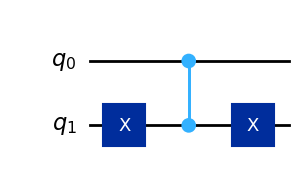

In [ ]:
num_qubits = 2
g_oracle = QuantumCircuit(num_qubits)

# To mark the state |10> with a phase flip:
# 1. Apply X gate to qubit 1 to convert |10> to |11>
g_oracle.x(1)
# 2. Apply a Controlled-Z (CZ) gate between qubit 0 and qubit 1
#    This flips the phase of the |11> state.
g_oracle.cz(0, 1)
# 3. Apply X gate to qubit 1 again to convert |11> back to |10>
g_oracle.x(1)

Uw = g_oracle.to_gate(label='Uw')

display(g_oracle.draw('mpl'))

# 1.2. Operador de Difusão

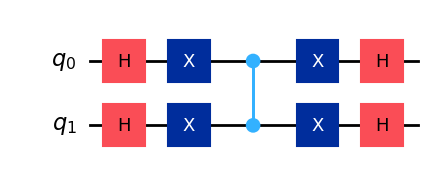

In [ ]:
g_difusor = QuantumCircuit(num_qubits)

g_difusor.h(range(num_qubits))
g_difusor.x(range(num_qubits))
g_difusor.cz(0,1)
g_difusor.x(range(num_qubits))
g_difusor.h(range(num_qubits))

Us = g_difusor.to_gate(label='Us')

display(g_difusor.draw('mpl'))

# 1.3. Aplicando $U_sU_w$, uma única vez

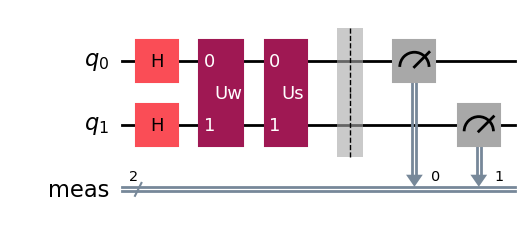

In [ ]:
g_qc = QuantumCircuit(num_qubits)

g_qc.h(range(num_qubits))
g_qc.append(Uw, range(num_qubits))
g_qc.append(Us, range(num_qubits))

g_qc.measure_all()

display(g_qc.draw('mpl'))

In [ ]:
simulador = AerSimulator()
qct = transpile(g_qc, backend = simulador)
job = simulador.run(qct)
result = job.result()
result.get_counts()



{'01': 1024}

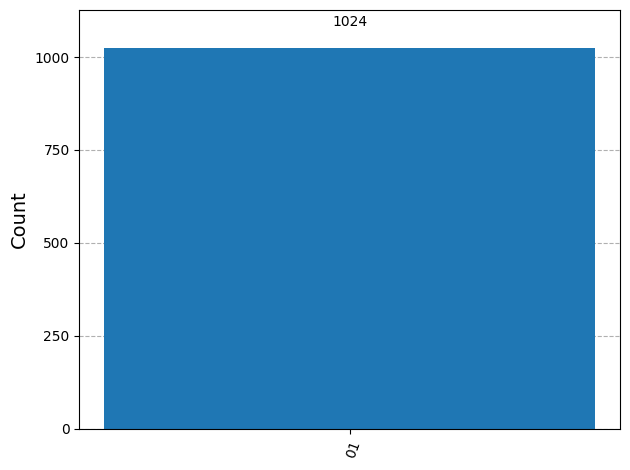

In [ ]:
plot_histogram(result.get_counts())

# 2. Segundo Cenário <a id='cenario2'></a>

O segundo cenário utiliza 16 qubits e 1 alvo, definido como o maior valor possível (1111 1111 1111 1111). Nesse caso, além de rodar a versão quântica, implemente uma busca clássica linear, percorrendo todos os estados de até , e compare o tempo de execução.

# 2.1. Oráculo de Marcação

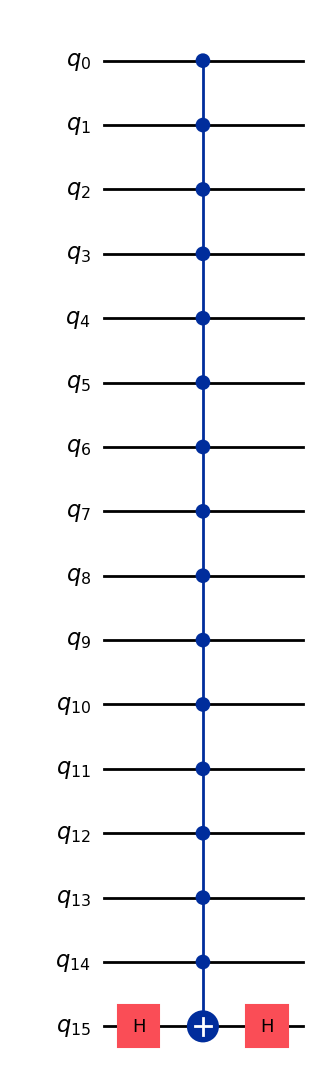

In [ ]:
num_qubits = 16
g_oracle = QuantumCircuit(num_qubits)

# Apply X gates to flip qubits 12 and 14 to '1' for the target state |1010 1111 1111 1111>
# (assuming qubit 0 is LSB, so 12th and 14th qubits are '0' in the target state)
# g_oracle.x(12)
# g_oracle.x(14)

# Define controls and target for the multi-controlled Z gate
# All qubits except the last one (qubit 15) are controls
controls = list(range(num_qubits - 1))
target = num_qubits - 1

# Apply the multi-controlled Z gate (MCZ) using MCX and Hadamard gates
g_oracle.h(target)
g_oracle.mcx(controls, target)
g_oracle.h(target)

# Revert the X gates to un-flip qubits 12 and 14
# g_oracle.x(12)
# g_oracle.x(14)

# Convert the constructed oracle circuit into a gate
Uw = g_oracle.to_gate(label='Uw')

# Display the circuit
display(g_oracle.draw('mpl'))

# 2.2. Operador de Difusão

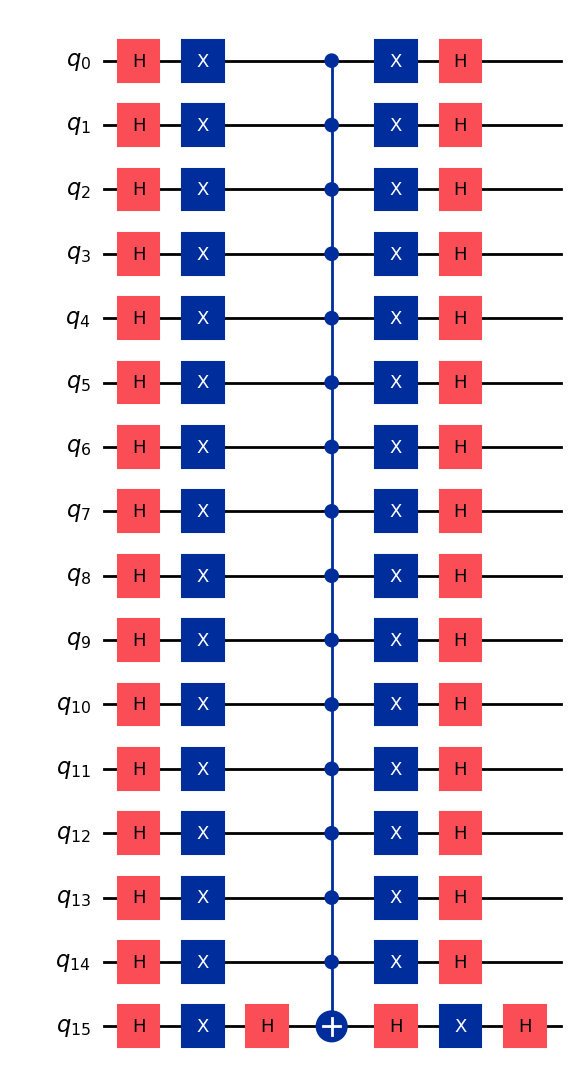

In [ ]:
num_qubits = 16
g_difusor = QuantumCircuit(num_qubits)

# Apply Hadamard gates to all qubits
g_difusor.h(range(num_qubits))

# Apply X gates to all qubits
g_difusor.x(range(num_qubits))

# Implement a multi-controlled Z gate for the |11...1> state
# This is done by applying H to the target, MCX, then H again.
controls = list(range(num_qubits - 1))
target = num_qubits - 1
g_difusor.h(target)
g_difusor.mcx(controls, target)
g_difusor.h(target)

# Revert X gates on all qubits
g_difusor.x(range(num_qubits))

# Revert Hadamard gates on all qubits
g_difusor.h(range(num_qubits))

# Convert the constructed diffuser circuit into a gate
Us = g_difusor.to_gate(label='Us')

# Display the circuit
display(g_difusor.draw('mpl'))

# 2.3. Aplicando $U_sU_w$, $5 \times$

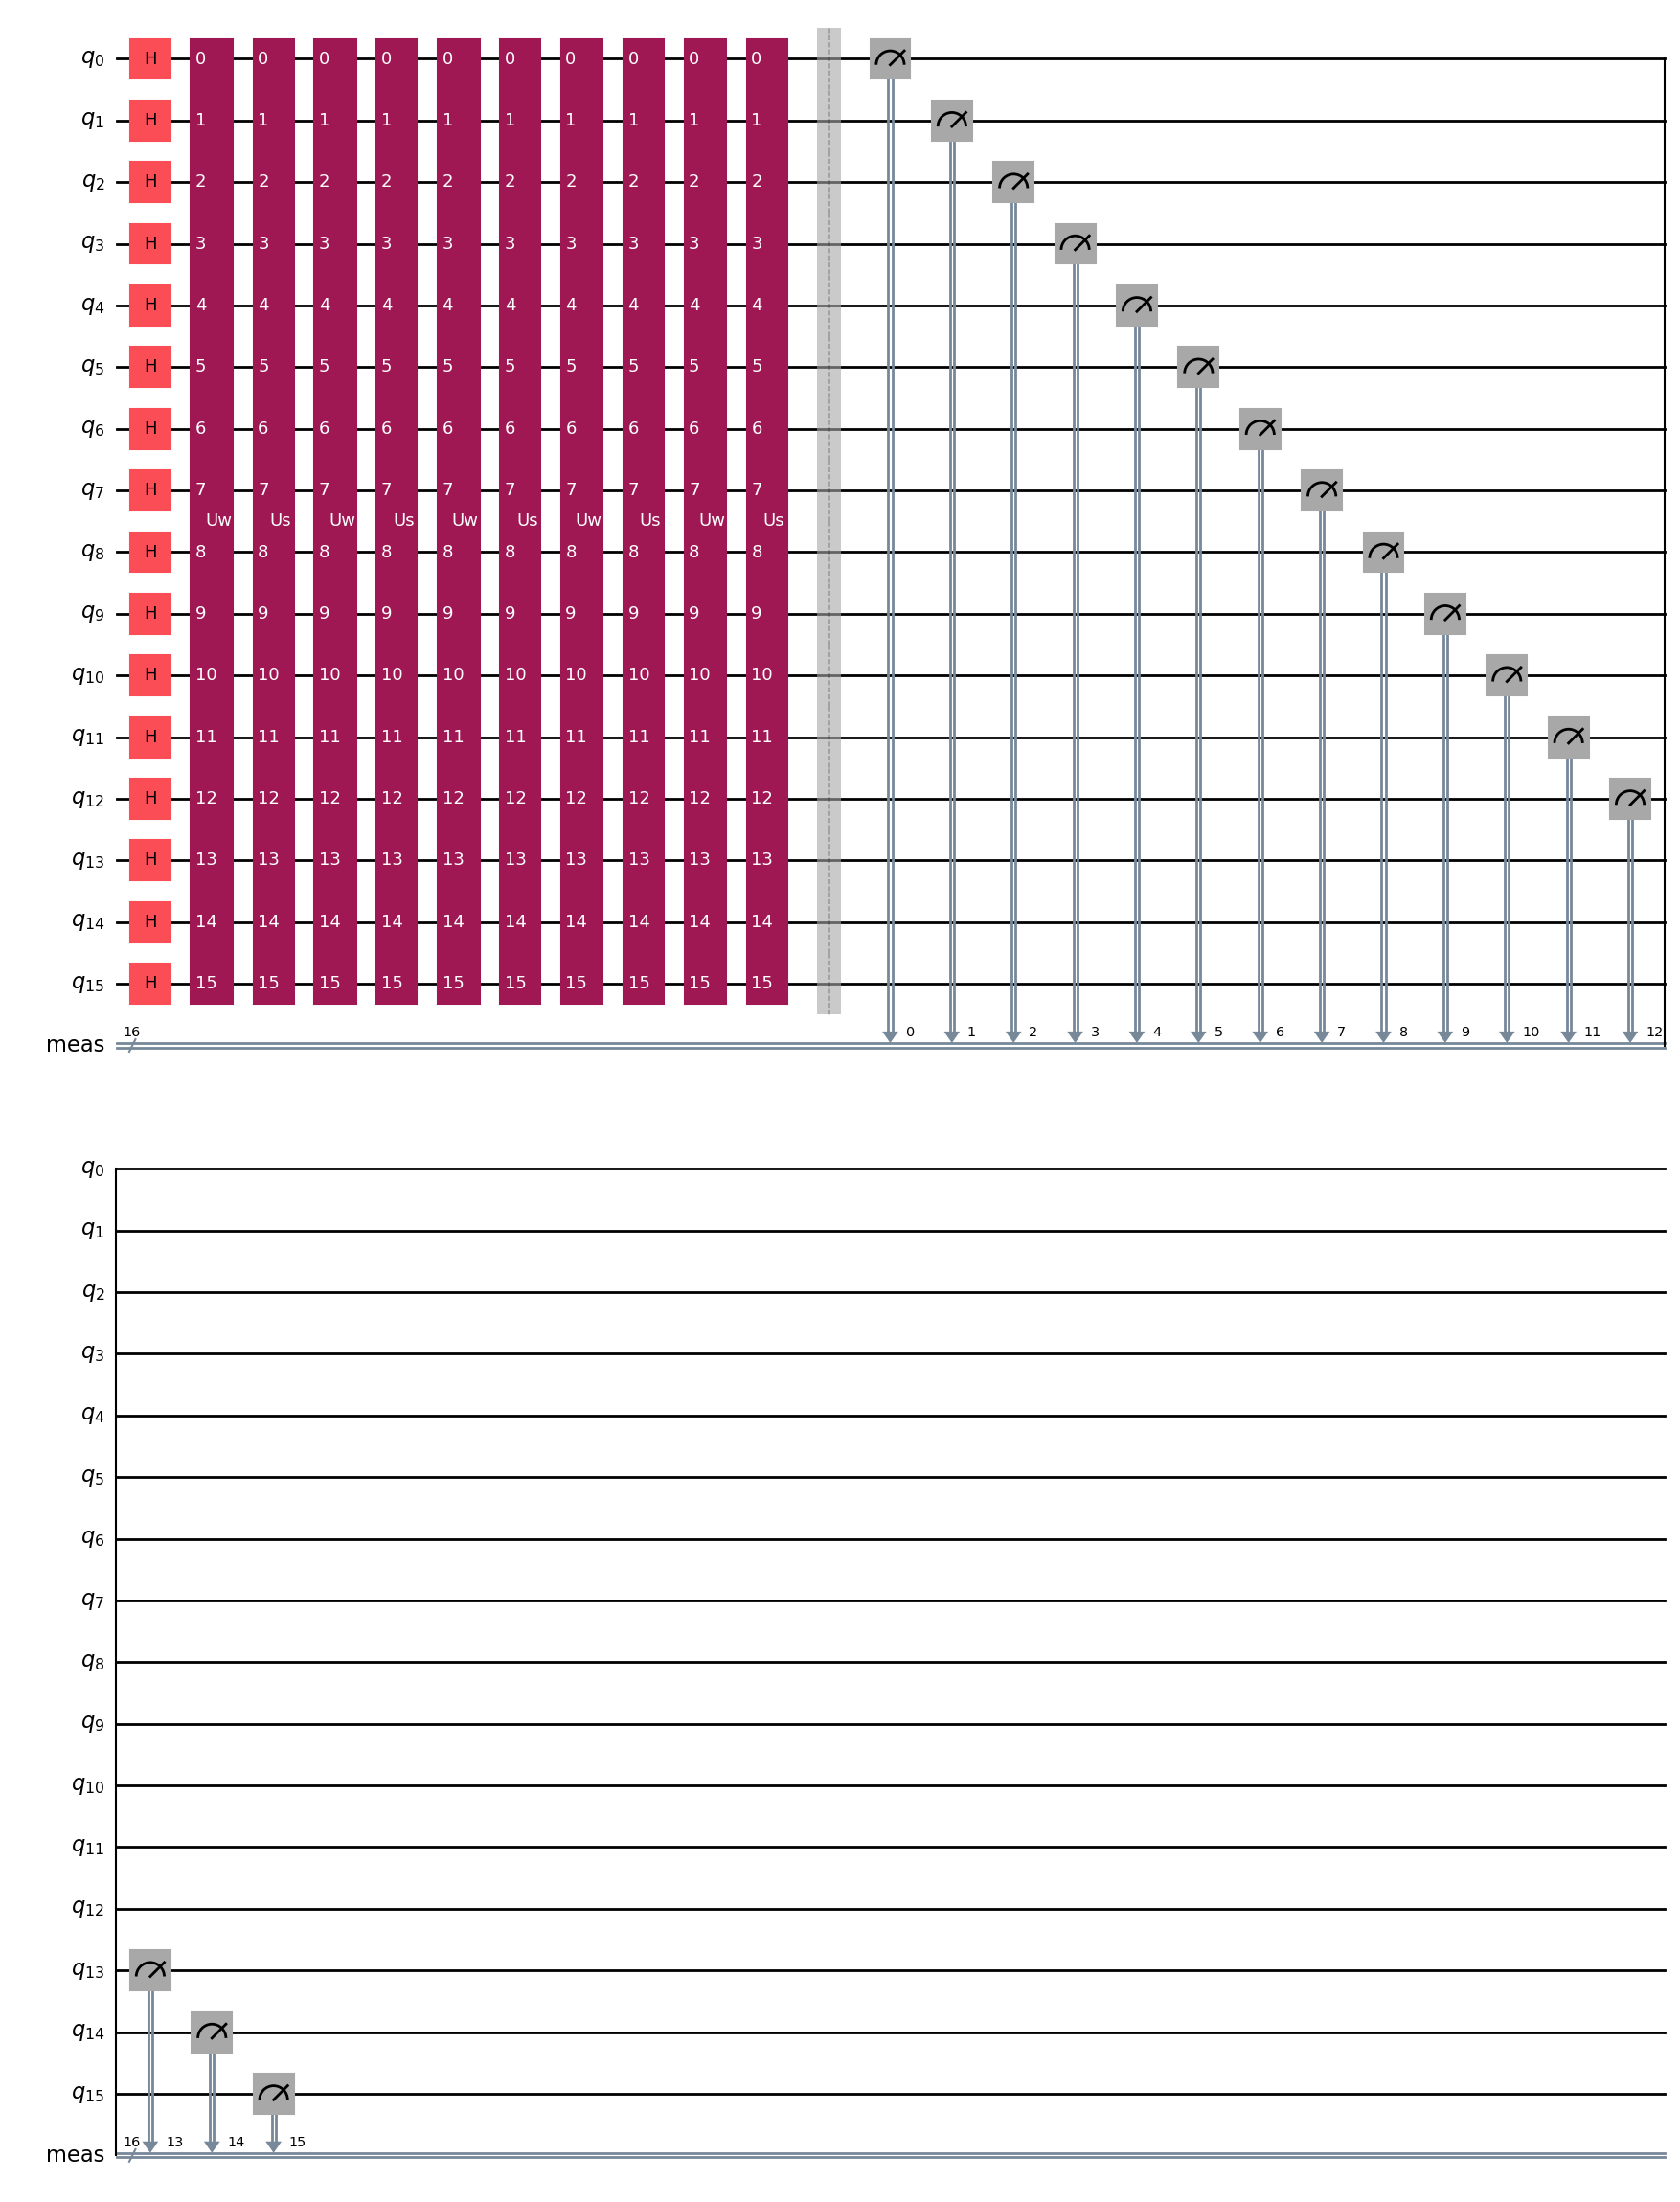

In [ ]:
g_qc = QuantumCircuit(num_qubits)

g_qc.h(range(num_qubits))

for i in range(5):
  g_qc.append(Uw, range(num_qubits))
  g_qc.append(Us, range(num_qubits))

g_qc.measure_all()

display(g_qc.draw('mpl'))

In [ ]:
simulador = AerSimulator()
qct = transpile(g_qc, backend = simulador)
job = simulador.run(qct)
result = job.result()
result.get_counts()



{'1001000111000100': 1,
 '0111001001011100': 1,
 '1101101101010100': 1,
 '0010101010000111': 1,
 '1000101001001111': 1,
 '0001101111001011': 1,
 '0101011000000111': 1,
 '1100010000100011': 1,
 '1000110010100000': 1,
 '0101110011001111': 1,
 '0000001000010011': 1,
 '1001111110100000': 1,
 '1011110101010001': 1,
 '1010010111110010': 1,
 '1110110100100110': 1,
 '1000101011111100': 1,
 '0101111011110010': 1,
 '0100100010001000': 1,
 '1001000100111001': 1,
 '1101010011001101': 1,
 '1000001000110110': 1,
 '1001001001100111': 1,
 '0010010110000100': 1,
 '1011100011010101': 1,
 '0010011101100110': 1,
 '0100011000110010': 1,
 '1100110101010100': 1,
 '0111110110110101': 1,
 '0100101011100000': 1,
 '0010111000011110': 1,
 '0000001110101100': 1,
 '0001010010010011': 1,
 '1010010101011110': 1,
 '1100110011110001': 1,
 '1110100111001000': 1,
 '0011010001111001': 1,
 '0100010101011001': 1,
 '0100000011110011': 1,
 '1100000001011110': 1,
 '0010011001011111': 1,
 '1000001100010101': 1,
 '11100010110000

In [ ]:
counts = result.get_counts()
sorted_counts = sorted(counts.items(), key=lambda item: item[1], reverse=True)
top_5_results = sorted_counts[:5]

print("Top 5 results with highest values:")
for key, value in top_5_results:
    print(f"Key: {key}, Value: {value}")

Top 5 results with highest values:
Key: 1111111111111111, Value: 4
Key: 0011110100010110, Value: 2
Key: 0000001110010100, Value: 2
Key: 1101000011010110, Value: 2
Key: 1000010100100001, Value: 2


# 2.4. Busca Clássica

In [ ]:
import itertools
import random

# Generate all possible 16-bit binary strings
all_16bit_values = []
for bits in itertools.product('01', repeat=16):
    all_16bit_values.append("".join(bits))

# Randomly shuffle the list
random.shuffle(all_16bit_values)

# Print the first few to demonstrate (the full list is very long)
print(f"Generated {len(all_16bit_values)} unique 16-bit binary values.")
print("First 10 random values:")
for i in range(10):
    print(all_16bit_values[i])

# The complete shuffled list is in 'all_16bit_values'


Generated 65536 unique 16-bit binary values.
First 10 random values:
1011000111100101
0001011000001001
1101100111110110
1111110011100011
0001010100111100
1000001010010111
1101011000100110
0010000101110011
0010010000101111
1111100111000100


In [ ]:
import time

target_element = '1111111111111111'
iterations = 0
found = False

start_time = time.time()

for i, element in enumerate(all_16bit_values):
    iterations += 1
    if element == target_element:
        found = True
        break

end_time = time.time()

execution_time = end_time - start_time

if found:
    print(f"Element '{target_element}' found.")
    print(f"Execution time: {execution_time:.6f} seconds.")
    print(f"Number of iterations: {iterations}")
else:
    print(f"Element '{target_element}' not found in the list.")
    print(f"Execution time: {execution_time:.6f} seconds.")
    print(f"Number of iterations: {iterations} (full list scanned)")

Element '1111111111111111' found.
Execution time: 0.044882 seconds.
Number of iterations: 22553


# 3. Terceiro Cenário <a id='cenario3'></a>

O terceiro cenário consiste em usar o maior número de qubits viável no seu ambiente, com apenas um alvo. O objetivo aqui é observar os limites da simulação, verificando se ocorrem erros, lentidão ou travamentos.

**O simulador (AerSimulator) suporta até 29 qubits.**

```
CircuitTooWideForTarget: 'Number of qubits (32) in circuit-129 is greater than maximum (29) in the coupling_map'
```

In [ ]:
num_qubits = 20

# 3.1. Oráculo de Marcação

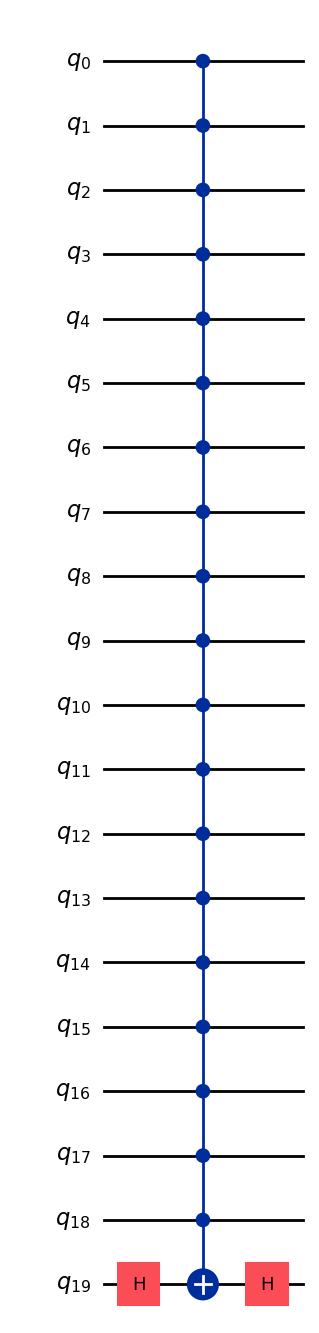

In [ ]:
g_oracle = QuantumCircuit(num_qubits)

# Apply X gates to flip qubits 12 and 14 to '1' for the target state |1010 1111 1111 1111>
# (assuming qubit 0 is LSB, so 12th and 14th qubits are '0' in the target state)
# g_oracle.x(12)
# g_oracle.x(14)

# Define controls and target for the multi-controlled Z gate
# All qubits except the last one (qubit 15) are controls
controls = list(range(num_qubits - 1))
target = num_qubits - 1

# Apply the multi-controlled Z gate (MCZ) using MCX and Hadamard gates
g_oracle.h(target)
g_oracle.mcx(controls, target)
g_oracle.h(target)

# Revert the X gates to un-flip qubits 12 and 14
# g_oracle.x(12)
# g_oracle.x(14)

# Convert the constructed oracle circuit into a gate
Uw = g_oracle.to_gate(label='Uw')

# Display the circuit
display(g_oracle.draw('mpl'))

# 3.2. Operador de Difusão

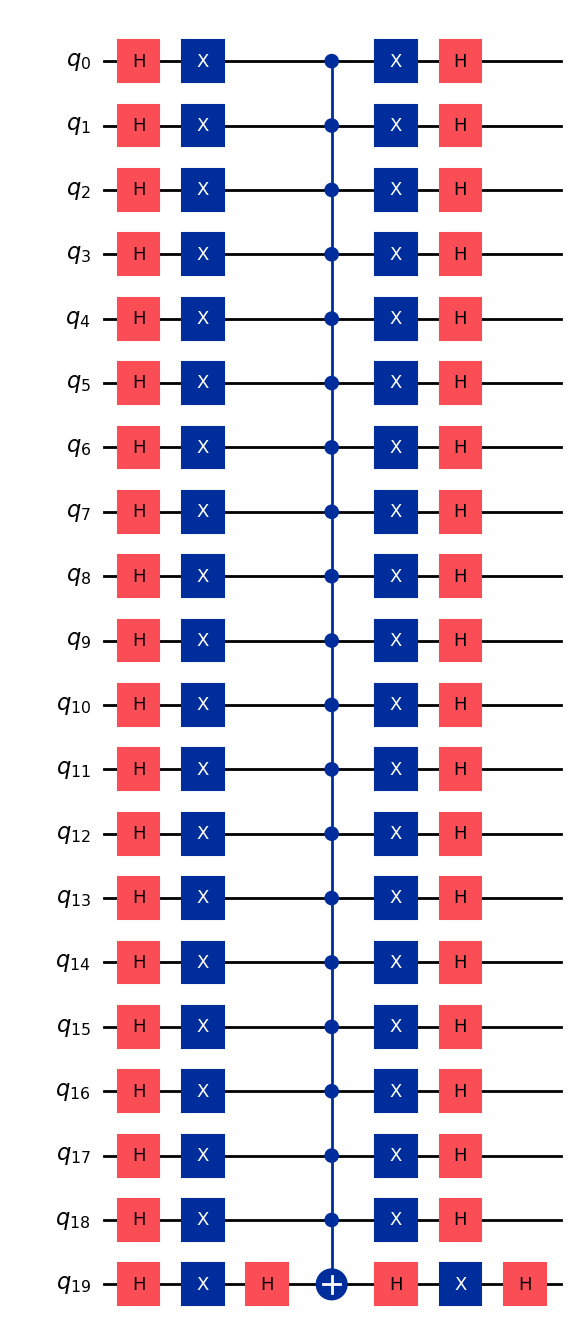

In [ ]:
g_difusor = QuantumCircuit(num_qubits)

# Apply Hadamard gates to all qubits
g_difusor.h(range(num_qubits))

# Apply X gates to all qubits
g_difusor.x(range(num_qubits))

# Implement a multi-controlled Z gate for the |11...1> state
# This is done by applying H to the target, MCX, then H again.
controls = list(range(num_qubits - 1))
target = num_qubits - 1
g_difusor.h(target)
g_difusor.mcx(controls, target)
g_difusor.h(target)

# Revert X gates on all qubits
g_difusor.x(range(num_qubits))

# Revert Hadamard gates on all qubits
g_difusor.h(range(num_qubits))

# Convert the constructed diffuser circuit into a gate
Us = g_difusor.to_gate(label='Us')

# Display the circuit
display(g_difusor.draw('mpl'))

# 3.3. Aplicando $U_sU_w$, $r \times$

$$ r = \frac{\pi}{4} \sqrt{\frac{2^n}{k}}$$

In [ ]:
k = 1
r = int(np.ceil(np.pi/4*np.sqrt(2**num_qubits/k)))
r

805

In [ ]:
g_qc = QuantumCircuit(num_qubits)

g_qc.h(range(num_qubits))

k = 1
r = int(np.ceil(np.pi/4*np.sqrt(2**num_qubits/k)))

start_time = time.time()

for i in range(r):
  if i%10000 == 0:
    print(f'Round {i}')
    end_time = time.time()
    execution_time = end_time - start_time
    print(f"Execution time: {execution_time:.6f} seconds.")

  g_qc.append(Uw, range(num_qubits))
  g_qc.append(Us, range(num_qubits))

g_qc.measure_all()

# display(g_qc.draw('mpl'))

Round 0
Execution time: 0.000222 seconds.


In [ ]:
try:
    import psutil
except ImportError:
    print("psutil not found. Installing...")
    !pip install psutil
    import psutil

# Get memory information
memory_info = psutil.virtual_memory()

print(f"Memória Total: {memory_info.total / (1024**3):.2f} GB")
print(f"Memória Usada: {memory_info.used / (1024**3):.2f} GB")
print(f"Memória Disponível: {memory_info.available / (1024**3):.2f} GB")

Memória Total: 12.67 GB
Memória Usada: 1.07 GB
Memória Disponível: 11.33 GB


In [ ]:
from collections import Counter

simulador = AerSimulator()
qct = transpile(g_qc, backend = simulador)

start_time = time.time()

total_shots = 512  # Total de execuções desejadas
intermediate_shots = 50  # Intervalo para mostrar resultados intermediários
results_counter = Counter()

start_time = time.time()

for i in range(0, total_shots, intermediate_shots):
    shots_to_run = min(intermediate_shots, total_shots - i)
    result = simulador.run(qct, shots=shots_to_run).result()

    # Agregando os resultados
    results_counter.update(result.get_counts())

    memory_info = psutil.virtual_memory()

    # Exibindo resultados intermediários
    print(f"Shot = {i}")

    # print(f"Memória Usada: {memory_info.used / (1024**3):.2f} GB")
    print(f"Memória Disponível: {memory_info.available / (1024**3):.2f} GB")

    execution_time = time.time() - start_time
    print(f"Execution time: {execution_time:.6f} seconds.")

# Exibir resultados finais
print("Resultados finais:", dict(results_counter))



Shot = 0
Memória Usada: 1.15 GB
Memória Disponível: 11.25 GB
Shot = 100
Memória Usada: 1.17 GB
Memória Disponível: 11.23 GB
Shot = 200
Memória Usada: 1.15 GB
Memória Disponível: 11.25 GB
Shot = 300
Memória Usada: 1.16 GB
Memória Disponível: 11.24 GB
Shot = 400
Memória Usada: 1.16 GB
Memória Disponível: 11.24 GB
Shot = 500
Memória Usada: 1.15 GB
Memória Disponível: 11.25 GB
Shot = 600
Memória Usada: 1.16 GB
Memória Disponível: 11.24 GB
Shot = 700
Memória Usada: 1.16 GB
Memória Disponível: 11.24 GB
Shot = 800
Memória Usada: 1.20 GB
Memória Disponível: 11.20 GB
Shot = 900
Memória Usada: 1.18 GB
Memória Disponível: 11.22 GB
Shot = 1000
Memória Usada: 1.21 GB
Memória Disponível: 11.19 GB
Resultados finais: {'11111111111111111111': 1024}


# 4. Quarto Cenário <a id='cenario4'></a>

No quarto cenário, configure o circuito com 5 qubits e múltiplos alvos (por exemplo, os estados 3, 7 e 11). Avalie o impacto de múltiplas soluções sobre a fidelidade e a distribuição das medições. Calcule o número ideal de iterações ajustando a fórmula para 3 estados.

# 4.1. Oráculo de Marcação

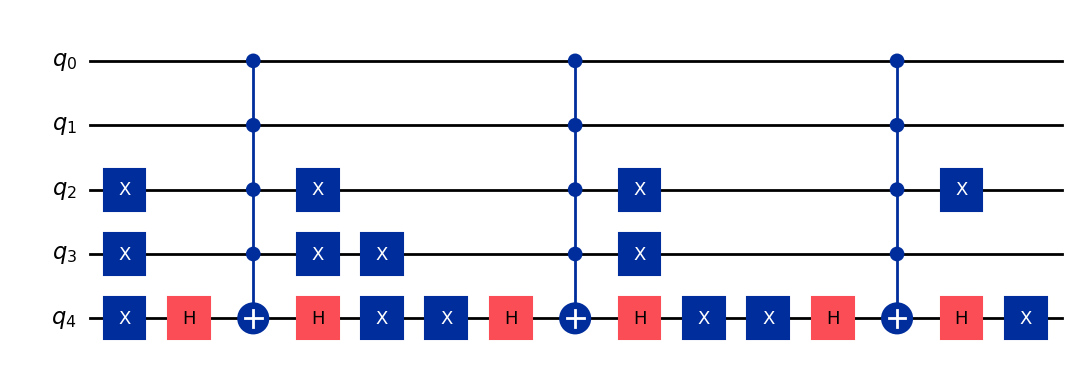

In [ ]:
def build_single_target_oracle(qc, target_bitstring_msb_first, num_qubits):
    """
    Applies a phase flip to the computational basis state represented by target_bitstring_msb_first.
    target_bitstring_msb_first: A string like '00011' (MSB first, e.g., '0' for q4, '1' for q0).
    qc: The QuantumCircuit to add gates to.
    num_qubits: The total number of qubits in the circuit.
    """
    assert len(target_bitstring_msb_first) == num_qubits, "Target bitstring length must match number of qubits."

    # Apply X gates to flip '0's to '1's for the target state
    # Qiskit indexes qubits from 0 (LSB) to num_qubits-1 (MSB).
    # target_bitstring_msb_first is MSB first, so target_bitstring_msb_first[0] is for qubit num_qubits-1.
    for i in range(num_qubits):
        # The bit for qubit i is at index (num_qubits - 1 - i) in the MSB-first string.
        if target_bitstring_msb_first[num_qubits - 1 - i] == '0':
            qc.x(i)

    # Apply multi-controlled Z gate (MCZ)
    # This gate applies a phase flip when all qubits are |1>.
    if num_qubits == 1:
        qc.z(0)
    elif num_qubits == 2:
        qc.cz(0, 1)
    else:
        # For n > 2, use the H-MCX-H decomposition.
        # Controls are all but the last qubit, target is the last qubit.
        controls_for_mcx = list(range(num_qubits - 1))
        target_for_mcx = num_qubits - 1

        qc.h(target_for_mcx)
        qc.mcx(controls_for_mcx, target_for_mcx)
        qc.h(target_for_mcx)

    # Revert X gates
    for i in range(num_qubits):
        if target_bitstring_msb_first[num_qubits - 1 - i] == '0':
            qc.x(i)


num_qubits = 5
g_oracle = QuantumCircuit(num_qubits)

# Define target states as decimal values
target_states_decimal = [3, 7, 11]

# Convert target states to 5-bit binary strings (MSB first)
target_states_binary = [bin(x)[2:].zfill(num_qubits) for x in target_states_decimal]

# Build the oracle by sequentially adding single-target phase flips for each target state
for target_bs in target_states_binary:
    build_single_target_oracle(g_oracle, target_bs, num_qubits)

# Convert the constructed oracle circuit into a gate
Uw = g_oracle.to_gate(label='Uw')

# Display the circuit
display(g_oracle.draw('mpl'))

# 4.2. Operador de Difusão

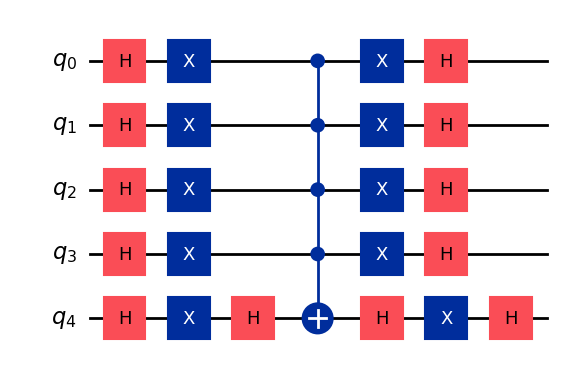

In [ ]:
g_difusor = QuantumCircuit(num_qubits)

# Apply Hadamard gates to all qubits
g_difusor.h(range(num_qubits))

# Apply X gates to all qubits
g_difusor.x(range(num_qubits))

# Implement a multi-controlled Z gate for the |11...1> state
# This is done by applying H to the target, MCX, then H again.
controls = list(range(num_qubits - 1))
target = num_qubits - 1
g_difusor.h(target)
g_difusor.mcx(controls, target)
g_difusor.h(target)

# Revert X gates on all qubits
g_difusor.x(range(num_qubits))

# Revert Hadamard gates on all qubits
g_difusor.h(range(num_qubits))

# Convert the constructed diffuser circuit into a gate
Us = g_difusor.to_gate(label='Us')

# Display the circuit
display(g_difusor.draw('mpl'))

# 4.3. Aplicando $U_sU_w$, $5 \times$

$$ r = \frac{\pi}{4} \sqrt{\frac{2^n}{k}}$$

In [ ]:
k = 3
r = int(np.ceil(np.pi/4*np.sqrt(2**num_qubits/k)))
r

3

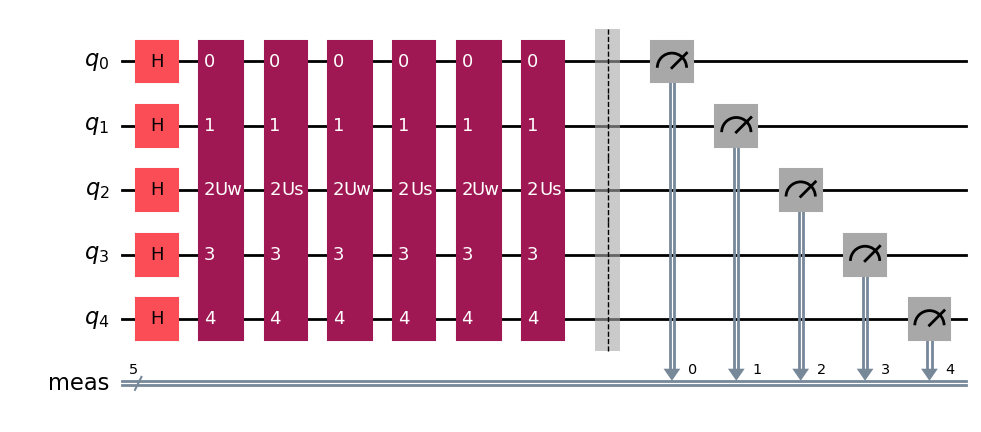

In [ ]:
g_qc = QuantumCircuit(num_qubits)

g_qc.h(range(num_qubits))

for i in range(3):
  g_qc.append(Uw, range(num_qubits))
  g_qc.append(Us, range(num_qubits))

g_qc.measure_all()

display(g_qc.draw('mpl'))

In [ ]:
simulador = AerSimulator()
qct = transpile(g_qc, backend = simulador)
job = simulador.run(qct)
result = job.result()
result.get_counts()



{'11000': 11,
 '10001': 11,
 '11110': 16,
 '01101': 16,
 '11100': 19,
 '10101': 16,
 '10010': 9,
 '00101': 10,
 '11010': 14,
 '01001': 10,
 '01110': 11,
 '11001': 13,
 '00000': 8,
 '10000': 12,
 '11101': 10,
 '00011': 241,
 '00111': 227,
 '01011': 220,
 '01111': 9,
 '00010': 10,
 '01000': 13,
 '01100': 6,
 '01010': 9,
 '11011': 8,
 '11111': 14,
 '10011': 15,
 '10111': 14,
 '10100': 8,
 '10110': 11,
 '00001': 15,
 '00110': 7,
 '00100': 11}

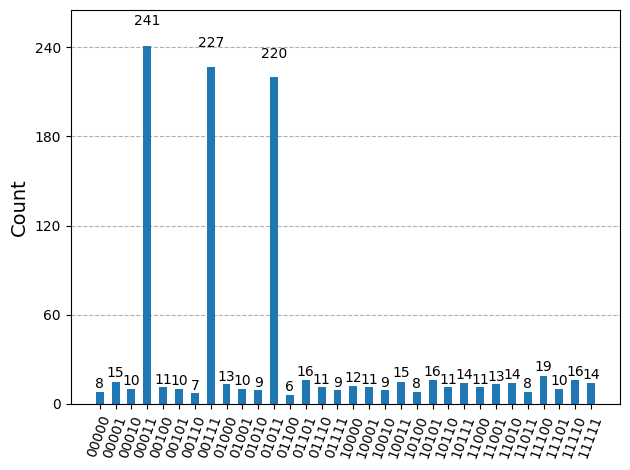

In [ ]:
plot_histogram(result.get_counts())

# 5. Operador Grover do Qiskit + qiskit_ibm_runtime <a id='cenario4plus'></a>

From https://quantum.cloud.ibm.com/docs/pt/tutorials/grovers-algorithm


In [ ]:
try:
  from qiskit_ibm_runtime import QiskitRuntimeService
  from qiskit_ibm_runtime import SamplerV2 as Sampler
except ImportError:
  print('Install qiskit_ibm_runtime')
  !pip install -q qiskit_ibm_runtime
  from qiskit_ibm_runtime import QiskitRuntimeService
  from qiskit_ibm_runtime import SamplerV2 as Sampler

Install qiskit_ibm_runtime
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 21.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 378.5/378.5 kB 25.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.8/75.8 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 7.9 MB/s eta 0:00:00


# 5.1. Oracle Grover

In [ ]:
# Built-in modules
import math

# Imports from Qiskit
from qiskit import QuantumCircuit
from qiskit.circuit.library import grover_operator, MCMTGate, ZGate
from qiskit.visualization import plot_distribution
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

# Imports from Qiskit Runtime
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_ibm_runtime import SamplerV2 as Sampler


def grover_oracle(marked_states):
    """Build a Grover oracle for multiple marked states

    Here we assume all input marked states have the same number of bits

    Parameters:
        marked_states (str or list): Marked states of oracle

    Returns:
        QuantumCircuit: Quantum circuit representing Grover oracle
    """
    if not isinstance(marked_states, list):
        marked_states = [marked_states]
    # Compute the number of qubits in circuit
    num_qubits = len(marked_states[0])

    qc = QuantumCircuit(num_qubits)
    # Mark each target state in the input list
    for target in marked_states:
        # Flip target bit-string to match Qiskit bit-ordering
        rev_target = target[::-1]
        # Find the indices of all the '0' elements in bit-string
        zero_inds = [
            ind
            for ind in range(num_qubits)
            if rev_target.startswith("0", ind)
        ]
        # Add a multi-controlled Z-gate with pre- and post-applied X-gates (open-controls)
        # where the target bit-string has a '0' entry
        if zero_inds:
            qc.x(zero_inds)
        qc.compose(MCMTGate(ZGate(), num_qubits - 1, 1), inplace=True)
        if zero_inds:
            qc.x(zero_inds)
    return qc

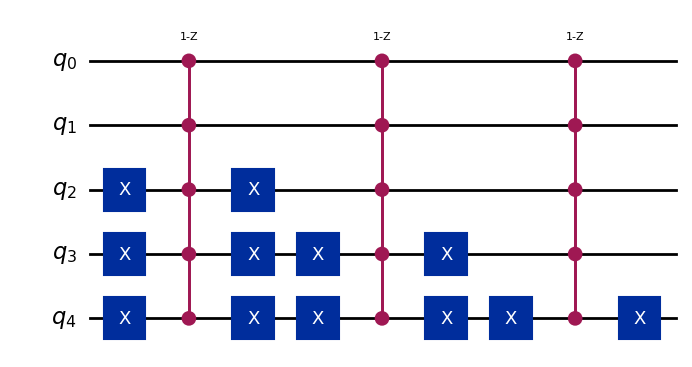

In [ ]:
marked_states = ["00011", "00111", "01111"]

oracle = grover_oracle(marked_states)
oracle.draw(output="mpl", style="iqp")

# 5.2. Operador Grover

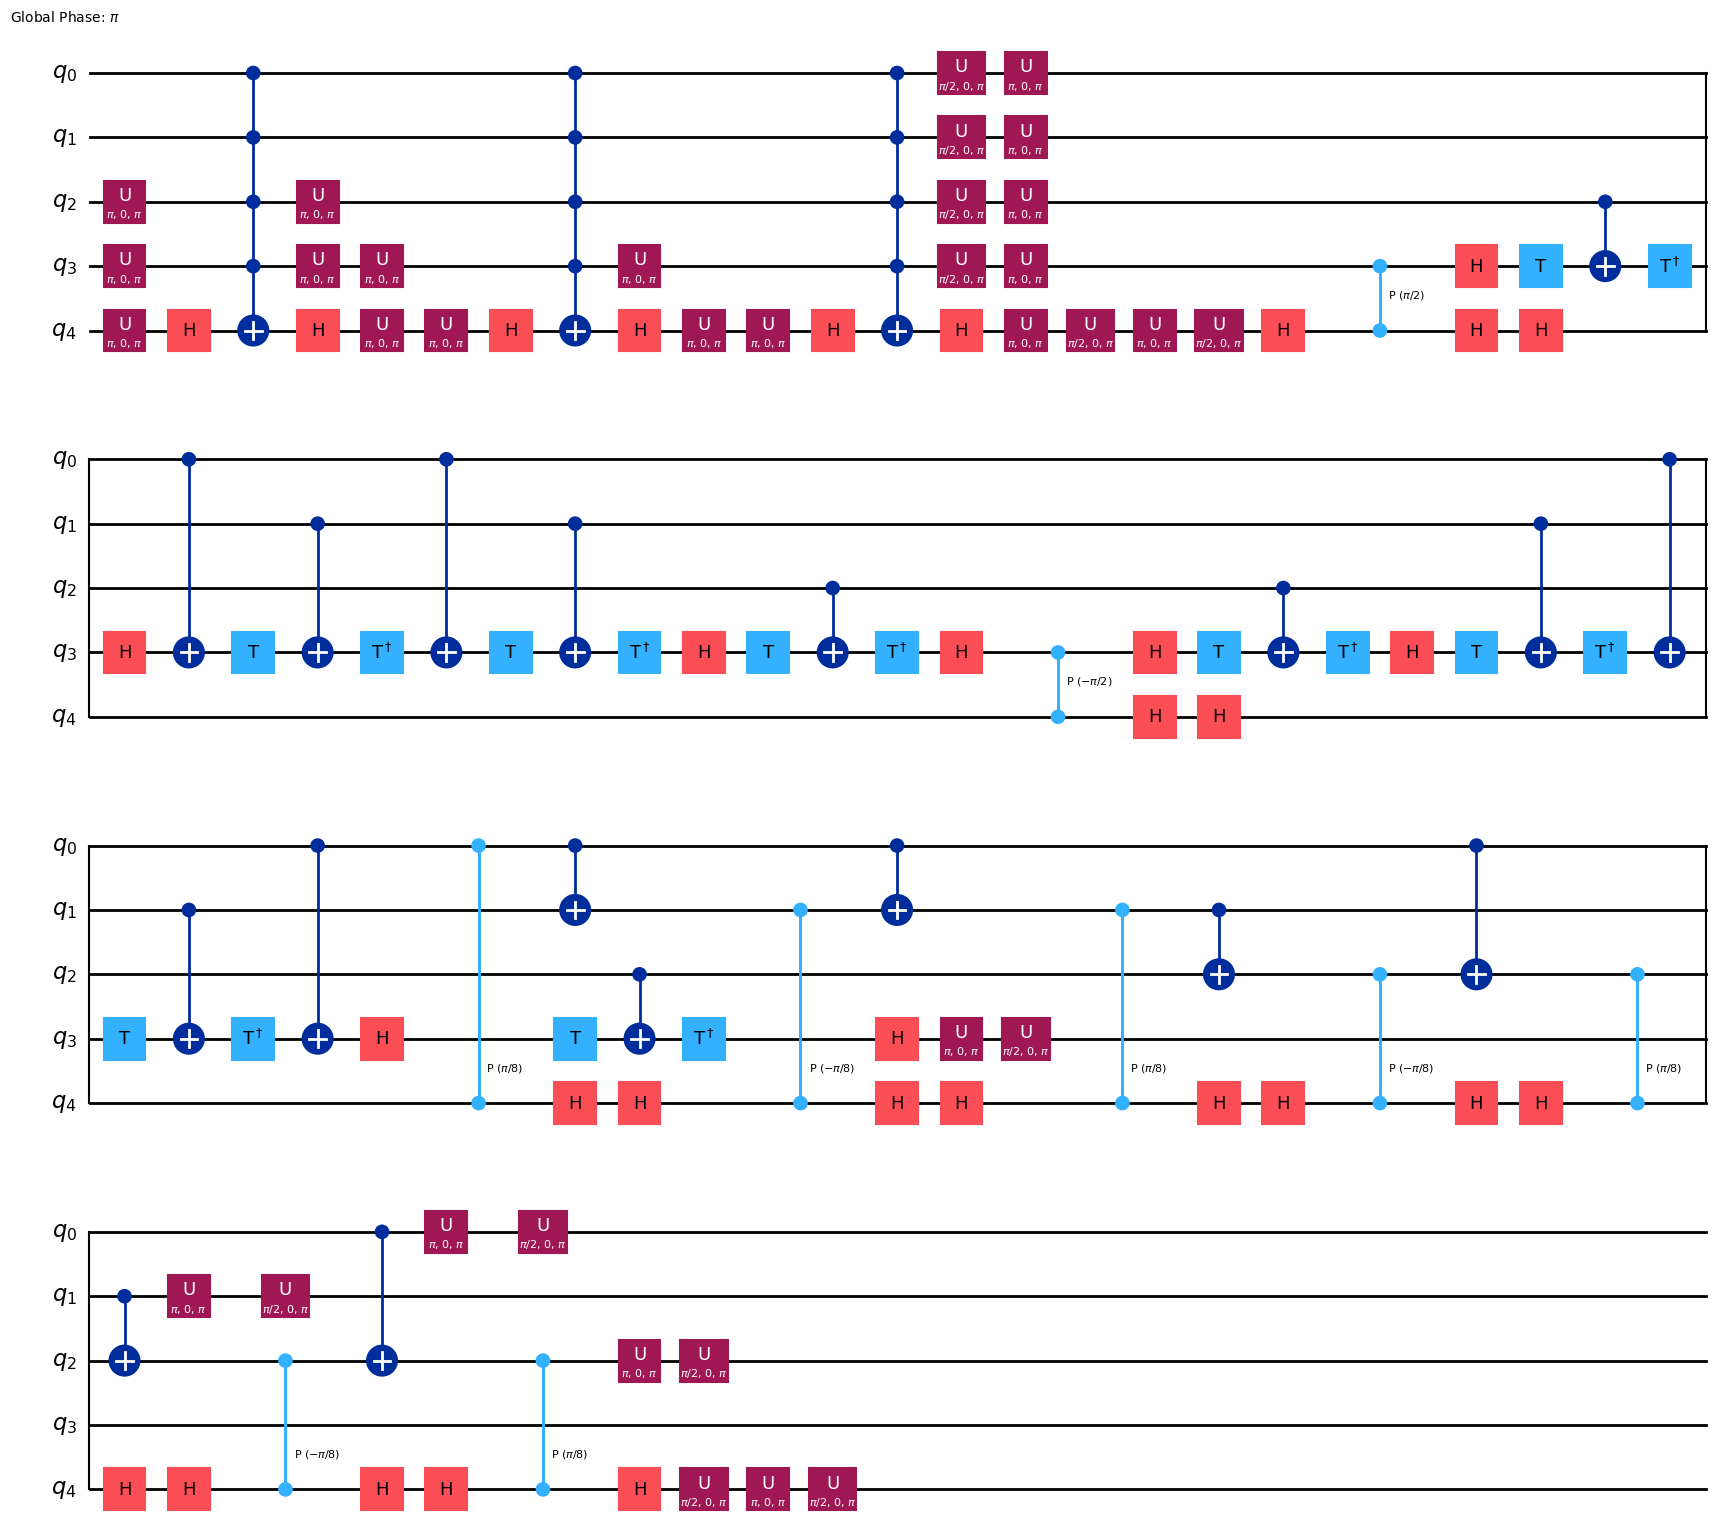

In [ ]:
grover_op = grover_operator(oracle)
grover_op.decompose().draw(output="mpl", style="iqp")

## 5.2.1. Número ótimo de iterações

In [ ]:
optimal_num_iterations = math.floor(
    math.pi
    / (4 * math.asin(math.sqrt(len(marked_states) / 2**grover_op.num_qubits)))
)

## 5.2.2. Circuito Grover Completo

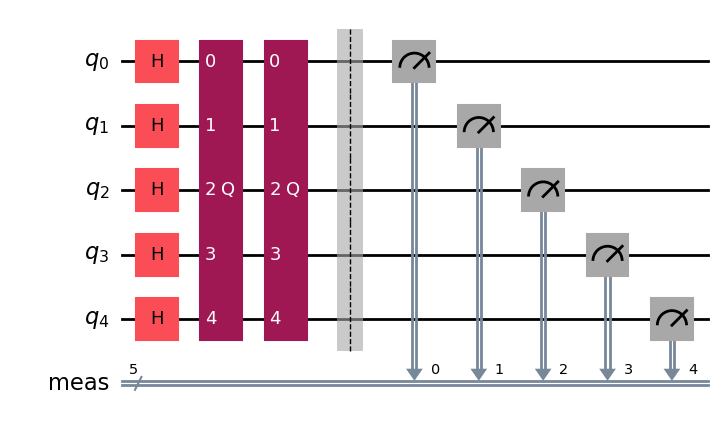

In [ ]:
qc = QuantumCircuit(grover_op.num_qubits)
# Create even superposition of all basis states
qc.h(range(grover_op.num_qubits))
# Apply Grover operator the optimal number of times
qc.compose(grover_op.power(optimal_num_iterations), inplace=True)
# Measure all qubits
qc.measure_all()
qc.draw(output="mpl", style="iqp")

# 5.3. Executando o Circuito no backend

## 5.3.1. Setando o backend

... empregue o seu Token aqui.
<!-- No token, substituir * pela inicial o filho mais velho -->

In [ ]:
service = QiskitRuntimeService(
    token = "4B1NyBMg*b8yEfKqciggvsr_VzKzc1Sn0u10rl_d-Wy*",
    channel = "ibm_cloud",
    instance = "crn:v1:bluemix:public:quantum-computing:us-east:a/c1072b2b029148c3a2328db9ebc5a84a:fa919622-e2df-4529-a115-78515bfd6329::"
)
# backend = service.get_backend("ibmq_qasm_simulator")

qiskit_runtime_service._discover_account:WARNING:2025-12-18 16:01:12,704: Loading account with the given token. A saved account will not be used.


In [ ]:
# To run on hardware, select the backend with the fewest number of jobs in the queue
# service = QiskitRuntimeService()
backend = service.least_busy(
    operational=True, simulator=False, min_num_qubits=127
)
backend.name

'ibm_torino'

In [ ]:
target = backend.target
pm = generate_preset_pass_manager(target=target, optimization_level=3)

circuit_isa = pm.run(qc)
circuit_isa.draw(output="mpl", idle_wires=False, style="iqp")

## 5.3.2. Executando

In [ ]:
# To run on local simulator:
#   1. Use the StatevectorSampler from qiskit.primitives instead
sampler = Sampler(mode=backend)
sampler.options.default_shots = 10_000
result = sampler.run([circuit_isa]).result()
dist = result[0].data.meas.get_counts()

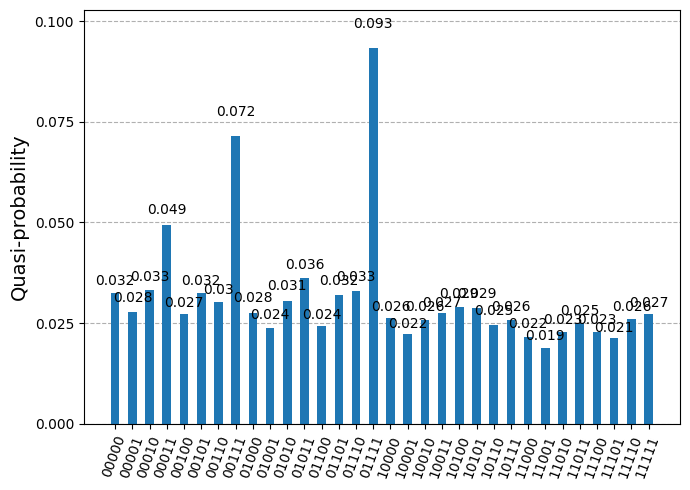

In [ ]:
plot_distribution(dist)

# Bibliografia

1. de Oliveira, M.C., Fanchini, F.F., Arruda, L.G.E. *Introdução à Computação Quântica: Teoria e Prática com Python e Qiskit.* Editora Quati. Edição dos autores (2025).

2. IBM QUANTUM. *Grover's algorithm*. Disponível em: https://quantum.cloud.ibm.com/docs/pt/tutorials/grovers-algorithm. Acesso em: 19 dez. 2025.

3. NIELSEN, M. A.; CHUANG, I. L. Quantum computation and quantum information. 2. ed. Cambridge: Cambridge University Press, 2010.
